#  Strategy

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import math

In [2]:
"""
BTC-USD
ETH-USD
ADA-USD
TRX-USD
XRP-USD
DOT1-USD
BNB-USD
EOS-USD
VET-USD
DOGE-USD
XLM-USD
BAT-USD
XEM-USD
ATOM1-USD
DASH-USD
LTC-USD
SXP-USD

"""

'\nBTC-USD\nETH-USD\nADA-USD\nTRX-USD\nXRP-USD\nDOT1-USD\nBNB-USD\nEOS-USD\nVET-USD\nDOGE-USD\nXLM-USD\nBAT-USD\nXEM-USD\nATOM1-USD\nDASH-USD\nLTC-USD\nSXP-USD\n\n'

In [3]:
start=datetime.datetime(2021,2,12)
end=datetime.datetime(2021,3,12)
stockTicker='BTC-USD'
shortWindow=2
longWindow=5

In [4]:
stock=web.DataReader(stockTicker,'yahoo',start,end)
stock.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-08,52314.070312,49506.054688,51174.117188,52246.523438,48597428048,52246.523438
2021-03-09,54824.117188,51981.832031,52272.968750,54824.117188,50912227385,54824.117188
2021-03-10,57258.253906,53290.890625,54824.011719,56008.550781,57295577614,56008.550781
2021-03-11,58091.062500,54484.593750,55963.179688,57805.121094,56772343595,57805.121094
2021-03-12,57996.621094,55376.648438,57821.218750,57332.089844,55689944702,57332.089844


In [5]:
shortMA=pd.DataFrame()
longMA=pd.DataFrame()
shortMA['Close']=stock['Close'].rolling(window=shortWindow).mean()
longMA['Close']=stock['Close'].rolling(window=longWindow).mean()


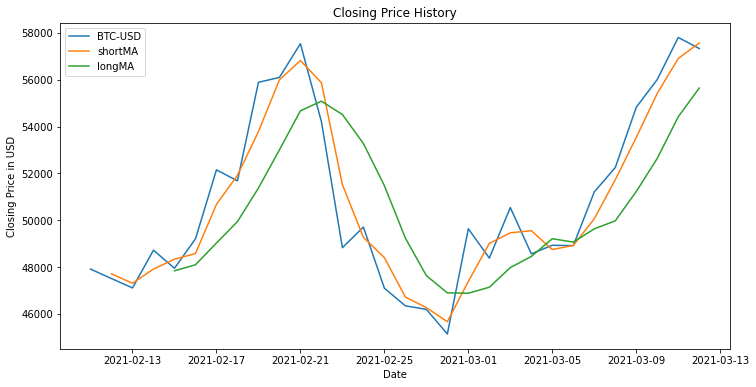

In [6]:
plt.figure(figsize=(12,6))
plt.plot(stock['Close'],label=stockTicker)
plt.plot(shortMA['Close'],label='shortMA')
plt.plot(longMA['Close'],label='longMA')
plt.title('Closing Price History')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.legend()
plt.show()

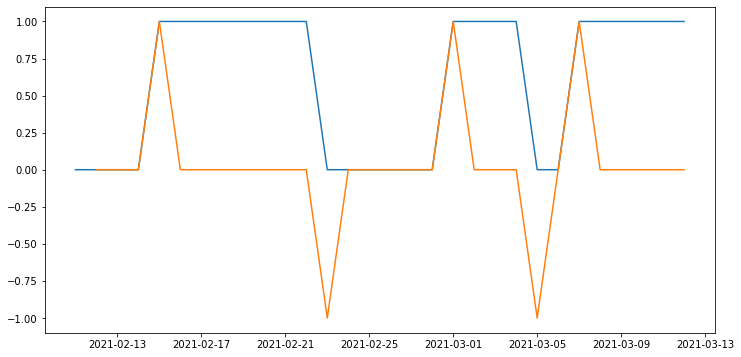

In [7]:
plt.figure(figsize=(12,6))

x=(shortMA['Close']>longMA['Close']).astype(int)
y=x.diff()

crossOverSignals=pd.DataFrame()
crossOverSignals[stockTicker]=stock['Close']
crossOverSignals['buy']=stock['Close'][y>0]
crossOverSignals['sell']=stock['Close'][y<0]
plt.plot(x)
plt.plot(y)


In [8]:
crossOverSignals

,BTC-USD,buy,sell
Date,,,
2021-02-11,47909.332031,NaN,NaN
2021-02-12,47504.851562,NaN,NaN
2021-02-13,47105.515625,NaN,NaN
2021-02-14,48717.289062,NaN,NaN
2021-02-15,47945.058594,47945.058594,NaN
2021-02-16,49199.871094,NaN,NaN
2021-02-17,52149.007812,NaN,NaN
2021-02-18,51679.796875,NaN,NaN
2021-02-19,55888.132812,NaN,NaN


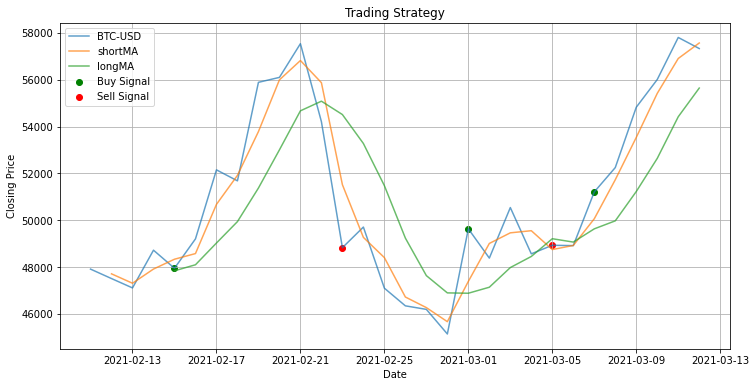

In [9]:
plt.figure(figsize=(12,6))
plt.plot(stock['Close'],label=stockTicker,alpha=0.7)
plt.plot(shortMA['Close'],label='shortMA',alpha=0.7)
plt.plot(longMA['Close'],label='longMA',alpha=0.7)
plt.scatter(crossOverSignals['buy'].index,crossOverSignals['buy'],color='g',label='Buy Signal')
plt.scatter(crossOverSignals['sell'].index,crossOverSignals['sell'],color='r',label='Sell Signal')

plt.title('Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
y[y>0]

Date
2021-02-15    1.0
2021-03-01    1.0
2021-03-07    1.0
Name: Close, dtype: float64

In [11]:
y[y<0]

Date
2021-02-23   -1.0
2021-03-05   -1.0
Name: Close, dtype: float64

In [12]:
stock_1=stock.loc[:,'Close']

In [13]:
train_data, test_data = stock_1[ :int(len(stock_1)*0.75)], stock_1[int(len(stock_1)*0.75):]


In [14]:
train_data.tail()

Date
2021-02-28    45137.769531
2021-03-01    49631.242188
2021-03-02    48378.988281
2021-03-03    50538.242188
2021-03-04    48561.167969
Name: Close, dtype: float64

In [15]:
test_data.tail()

Date
2021-03-08    52246.523438
2021-03-09    54824.117188
2021-03-10    56008.550781
2021-03-11    57805.121094
2021-03-12    57332.089844
Name: Close, dtype: float64

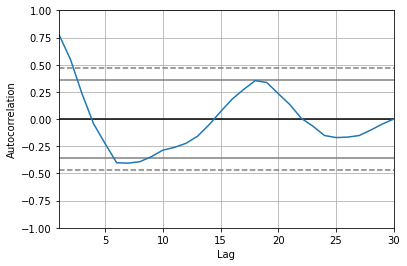

In [16]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(stock_1)
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    
    dftest = adfuller(dataset, autolag = 'AIC')
    
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    
    for key, val in dftest[4].items():
        
        print("\t",key, ": ", val)

In [18]:
adf_test(stock_1)


1. ADF :  -2.3344107083089334
2. P-Value :  0.16110983358982067
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 27
5. Critical Values :
	 1% :  -3.6996079738860943
	 5% :  -2.9764303469999494
	 10% :  -2.627601001371742


p: The number of lag observations included in the model, also called the lag order.

d: The number of times that the raw observations are differenced, also called the degree of differencing.

q: The size of the moving average window, also called the order of moving average.

In [19]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [20]:
stepwise_fit = auto_arima(stock_1,suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -268.742
Date:                Thu, 18 Mar 2021   AIC                            547.483
Time:                        08:16:39   BIC                            554.489
Sample:                             0   HQIC                           549.725
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.235e+04   7919.724      1.559      0.119   -3171.575    2.79e+04
ar.L1          0.7585      0.155      4.882      0.000       0.454       1.063
ma.L1          0.1715      0.174      0.989      0.323      -0.169       0.512
ma.L2          0.4786      0.182      2.629      0.009       0.122       0.835
sigma2      3.465e+06     25.862   1.34e+05      0.000    3.46e+06    3.46e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.39
Prob(Q):                              0.92   Prob(JB):                         0.82
Heteroskedasticity (H):               0.55   Skew:                            -0.28
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.01e+21. Standard errors may be unstable.
"""

In [21]:
#Split training in 75% and test in 25%
print(stock_1.shape)
train, test = stock_1[ :int(len(stock_1)*0.90)], stock_1[int(len(stock_1)*0.90):]

print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(30,)
(27,) (3,)
56008.55078125 57332.08984375


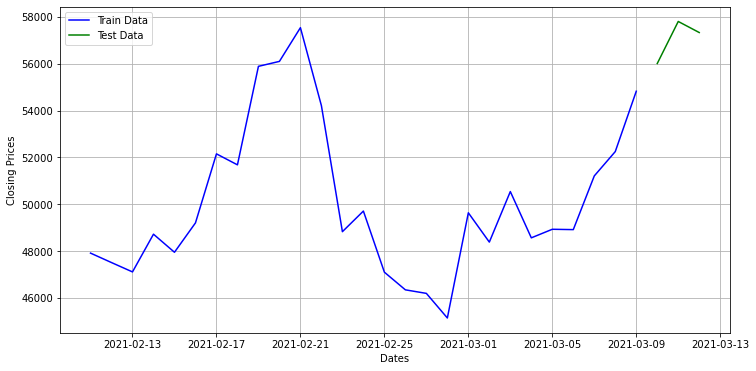

In [22]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train, 'blue', label='Train Data')
plt.plot(test, 'green', label='Test Data')
plt.legend()

In [23]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train,order=(0,1,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                   26
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -236.889
Method:                           css   S.D. of innovations           2191.129
Date:                Thu, 18 Mar 2021   AIC                            477.778
Time:                        08:16:39   BIC                            480.294
Sample:                    02-12-2021   HQIC                           478.502
                         - 03-09-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        265.9533    429.716      0.619      0.536    -576.274    1108.181
==============================================================================
"""

<AxesSubplot:xlabel='Date'>

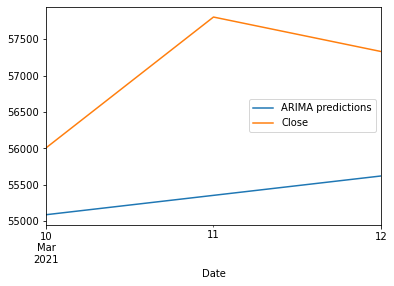

In [24]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test.plot(legend=True)

In [25]:
test.mean()

57048.587239583336

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

1804.2699212945554


In [27]:
model2=ARIMA(stock_1,order=(0,1,0))
model2=model2.fit()
stock_1.tail()

Date
2021-03-08    52246.523438
2021-03-09    54824.117188
2021-03-10    56008.550781
2021-03-11    57805.121094
2021-03-12    57332.089844
Name: Close, dtype: float64

In [28]:
from datetime import date
start_date=date.today()
end_date= start_date + datetime.timedelta(days=4)
index_future_dates=pd.date_range(start=start_date,end=end_date)
#print(index_future_dates)
pred=model2.predict(start=len(stock_1),end=len(stock_1)+4,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2021-03-18    57657.012527
2021-03-19    57981.935210
2021-03-20    58306.857893
2021-03-21    58631.780577
2021-03-22    58956.703260
Freq: D, Name: ARIMA Predictions, dtype: float64


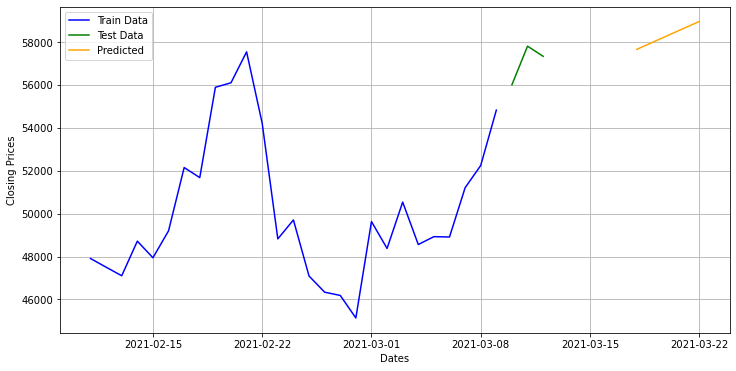

In [29]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train, 'blue', label='Train Data')
plt.plot(test, 'green', label='Test Data')
plt.plot(pred,'orange',label='Predicted')
plt.legend()
plt.show()

In [30]:
pred.tail()

2021-03-18    57657.012527
2021-03-19    57981.935210
2021-03-20    58306.857893
2021-03-21    58631.780577
2021-03-22    58956.703260
Freq: D, Name: ARIMA Predictions, dtype: float64

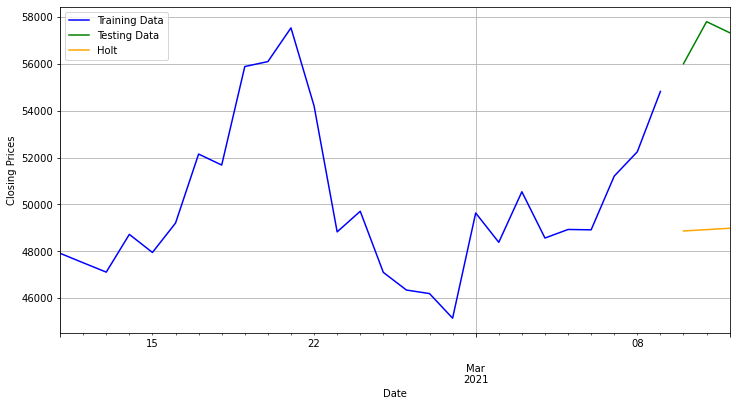

In [31]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#soothing slope=beta
fit1 = Holt(train).fit(smoothing_level = 0.1,smoothing_slope = 0.3)
Holt_df['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(12,6))
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
train.plot(label= 'Training Data',color='blue')
test.plot(label= 'Testing Data',color='green')
Holt_df['Holt_linear'].plot(label='Holt',color='orange')
plt.grid(True)
plt.legend()
plt.show()

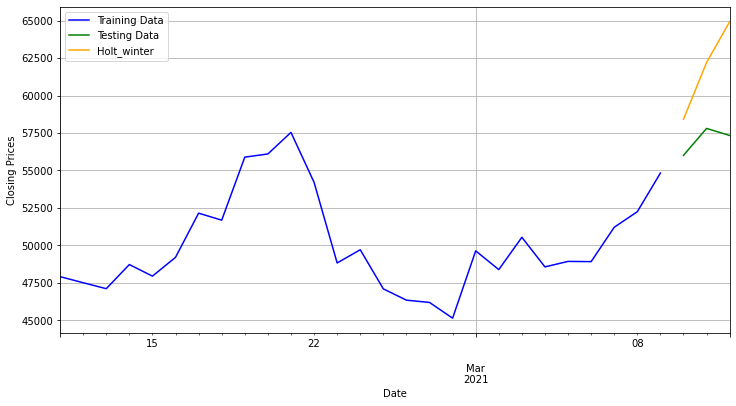

In [32]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(len(test))


plt.figure(figsize=(12,6))
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
train.plot(label= 'Training Data',color='blue')
test.plot(label= 'Testing Data',color='green')
Holt_Winter_df['Holt_Winter'].plot(label='Holt_winter',color='orange')
plt.grid(True)
plt.legend()

plt.show()